Dictionary is the default data structre of pyhton that uses hashing.\
Let's take a look onto how does it do it.

In [4]:
word_list=['a','b','c','d']
for char in word_list:
    print(ord(char)) ## ASCII VALUES 

97
98
99
100


In [6]:
def hash_value(key):
    sum=0
    for each in key:
        sum+=ord(each)
    return sum%100 ## size of array is used

In [7]:
hash_value('November')

30

### Creating Dictionary From Scratch

In [13]:
class Dictionary():
    def __init__(self):
        self.Max=100
        self.arr=[None for _ in range(self.Max)]
    def hash_value_put(self,key,value):
        sum=0
        for each in key:
            sum+=ord(each)
        self.arr[sum%self.Max]=value
    def get_value(self,key):
        sum=0
        for _ in key:
            sum+=ord(_)
        return self.arr[sum%self.Max]

In [14]:
t=Dictionary()
t.hash_value_put('November','Aarish')

In [15]:
t.get_value('November')

'Aarish'

### Couple of Modifications

In [46]:
class Dictionary():
    def __init__(self):
        self.Max=100
        self.arr=[None for _ in range(self.Max)]
    def __setitem__(self,key,value):
        sum=0
        for each in key:
            sum+=ord(each)
        self.arr[sum%self.Max]=value
    def __getitem__(self,key):
        sum=0
        for _ in key:
            sum+=ord(_)
        return self.arr[sum%self.Max]
    def delete(self,key):
        sum=0
        for each in key:
            sum+=ord(each)
        if(self.arr[sum%self.Max]):
            self.arr[sum%self.Max]=None
        else:
            raise Exception("Nothing To Delete")

In [47]:
t1=Dictionary()
t1['November']='Aarish'
t1['June']='Ayaz'

In [48]:
t1['November']

'Aarish'

In [49]:
t1.delete('November')

In [51]:
t1['November'] ## it outputs Nothing or None

In [50]:
t1.delete('Jan') ## raises an exception as the key was not alloted some value to delete

Exception: Nothing To Delete

### Visualizing the Happening
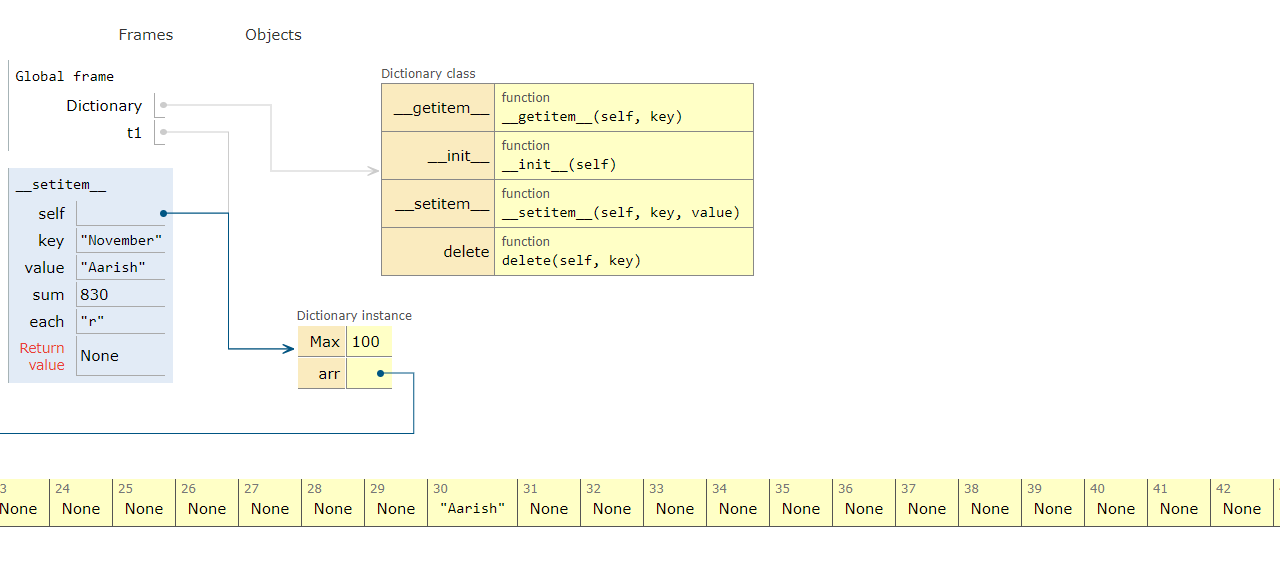

### Collision Handling

In [56]:
def hash_value(key):
    sum=0
    for each in key:
        sum+=ord(each)
    return sum%10 ## size of array is used

In [57]:
hash_value("march 6")

9

In [58]:
hash_value("march 17")

9

In [73]:
class Dictionary():
    def __init__(self):
        self.Max=10
        self.arr=[[] for _ in range(self.Max)]
    def hash_value(self,key):
        sum=0
        for each in key:
            sum+=ord(each)
        return sum%10 ## size of array is used
    def __getitem__(self,key):
        h=self.hash_value(key)
        for elem in self.arr[h]:
            if (elem[0] == key):
                return elem[1]
    def __setitem__(self,key,val):
        h=self.hash_value(key)
        found=False
        for idx,element in enumerate(self.arr[h]):
            if len(element)==2 and element[0]==key:
                self.arr[h][idx]=(key,val)
                found=True
                break
        if not found:
            self.arr[h].append((key,val))
    def delete(self,key):
        sum=0
        for each in key:
            sum+=ord(each)
        if(self.arr[sum%self.Max]):
            self.arr[sum%self.Max]=None
        else:
            raise Exception("Nothing To Delete")

In [74]:
t2=Dictionary()
t2['march 6']=128
t2['march 17']=130

In [75]:
t2.arr

[[], [], [], [], [], [], [], [], [], [('march 6', 128), ('march 17', 130)]]

In [76]:
t2['march 6']

128

In [77]:
t2['march 17']

130

### Tell Me What's Happening

since March 6 and March 17 give same hash values we store them at the same location in a nested Linked List in itself 

![collision.jpg](https://github.com/RheagalFire/Images/blob/main/collision.JPG)